# Image Classification Task

In [1]:
pip install tensorflow seaborn scikit-learn pandas 


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
 #pip install seaborn scikit-learn pandas  

In [23]:
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
import random
import glob
import requests
import itertools
import shutil
from PIL import Image


os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Conv2D, Conv2DTranspose, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, GlobalAveragePooling2D

import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



random.seed(123)

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 12)

In [25]:
train_datagen =ImageDataGenerator(preprocessing_function=preprocess_input)
valid_datagen =ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
training_paths = './training_folder/training_set/training_set'
train_generator=train_datagen.flow_from_directory(training_paths,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 seed=42)

valid_generator=valid_datagen.flow_from_directory(directory=r"./validation_folder/validation_set/validation_set",
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 seed=42)
test_generator=test_datagen.flow_from_directory(directory=r"./Test_folder/",
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=1,
                                                 class_mode=None,
                                                 shuffle=False)


Found 4859 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 0 images belonging to 1 classes.


In [5]:
# get number of data samples
train_length = len(train_generator)
valid_length = len(valid_generator)
test_length = len(test_generator)
print("Training_data_length : " , train_length)
print("Validation_data_length : " , valid_length)
print("Test_data_length : " , test_length)


train_size = round(train_length*0.7)  
print(train_size)

Training_data_length :  152
Validation_data_length :  7
Test_data_length :  10
106


In [6]:
# Model Description

base_model=MobileNetV2(weights='imagenet',include_top=False) 

x=base_model.output
print("X" , x)
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x) 
x=Dense(512,activation='relu')(x) 
preds=Dense(2,activation='softmax')(x) 

X KerasTensor(type_spec=TensorSpec(shape=(None, None, None, 1280), dtype=tf.float32, name=None), name='out_relu/Relu6:0', description="created by layer 'out_relu'")


In [7]:
model=Model(inputs=base_model.input,outputs=preds)

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 Conv1 (Conv2D)                 (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, None, None,   128         ['Conv1[0][0]']                  
                                32)                                                           

In [9]:
for layer in model.layers[:30]:
    layer.trainable=False
for layer in model.layers[30:]:
    layer.trainable=True

In [10]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [11]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
print(STEP_SIZE_TRAIN)
print(STEP_SIZE_VALID)
history = model.fit(x=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=15)

151
6
Epoch 1/15
151/151 [==============================] - 176s 1s/step - loss: 0.1680 - accuracy: 0.9422
Epoch 2/15
151/151 [==============================] - 168s 1s/step - loss: 0.1114 - accuracy: 0.9625
Epoch 3/15
151/151 [==============================] - 168s 1s/step - loss: 0.0735 - accuracy: 0.9751
Epoch 4/15
151/151 [==============================] - 168s 1s/step - loss: 0.0764 - accuracy: 0.9749
Epoch 5/15
151/151 [==============================] - 167s 1s/step - loss: 0.0504 - accuracy: 0.9814
Epoch 6/15
151/151 [==============================] - 190s 1s/step - loss: 0.0618 - accuracy: 0.9795
Epoch 7/15
151/151 [==============================] - 182s 1s/step - loss: 0.0413 - accuracy: 0.9855
Epoch 8/15
151/151 [==============================] - 209s 1s/step - loss: 0.0294 - accuracy: 0.9894
Epoch 9/15
151/151 [==============================] - 170s 1s/step - loss: 0.0454 - accuracy: 0.9845
Epoch 10/15
151/151 [==============================] - 218s 1s/step - loss: 0.0299 - 

In [12]:
print(history.history.keys())


dict_keys(['loss', 'accuracy'])


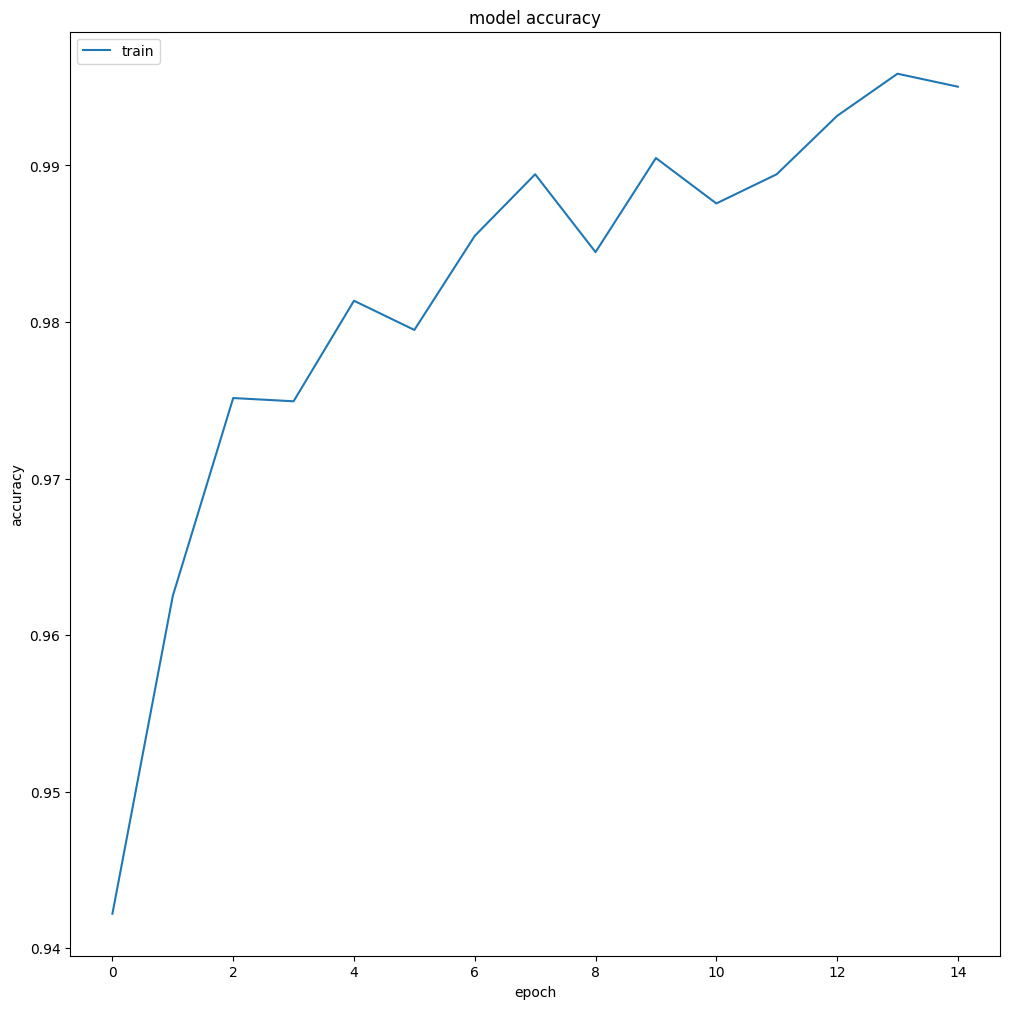

In [13]:
#Summarize history for accuracy

plt.plot(history.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

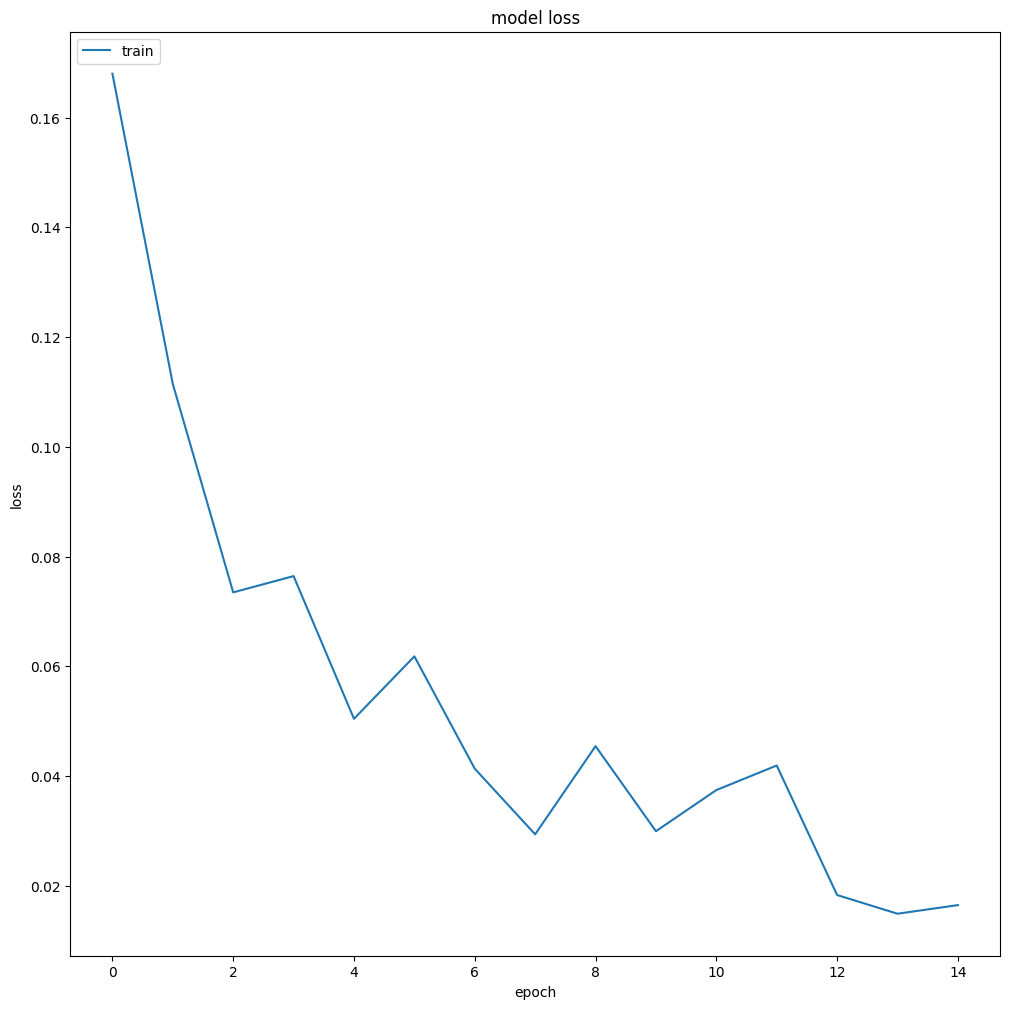

In [14]:
#summarize history for loss

plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [26]:
test_generator=test_datagen.flow_from_directory(directory=r"./Test_folder",
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=1,
                                                 class_mode=None,
                                                 shuffle=False,
                                                 seed=42)

Found 14 images belonging to 2 classes.


In [16]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
print(STEP_SIZE_TEST)
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

10


/tmp/ipykernel_6855/4273960702.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(test_generator,


10/10 [==============================] - 1s 21ms/step


In [17]:
predicted_class_indices=np.argmax(pred,axis=1)
print(predicted_class_indices)

[0 0 0 0 1 1 1 1 1 1]


In [18]:
labels = (train_generator.class_indices)
print(labels)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
print(predictions)

{'cats': 0, 'dogs': 1}
['cats', 'cats', 'cats', 'cats', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs']


In [19]:
import pandas as pd
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)

# CAT / DOG classification on an image

In [20]:
def load_image(img_path):
    img = image.load_img(img_path ,target_size=(224, 224))  # Accepts the image file and target_size for image
    img_array = image.img_to_array(img)                            # Convert images into array
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)    # expands the dimensions (4D)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims) #preprocesses the given image data to be in the same format as the images that MobileNet was originally trained on.

In [21]:

MobileNet_model = keras.models.load_model('MobileNet_V2_model.h5')

img_path = r'./cat_test.jpg'

preprocessed_image = load_image(img_path) #preprocessing
prediction_test = model.predict(preprocessed_image)
print(prediction_test)
predicted_class_indices=np.argmax(prediction_test,axis=1)
predictions = [labels[k] for k in predicted_class_indices]
print("Above Image belongs to : ", predictions)

1/1 [==============================] - 0s 42ms/step
[[0.9973387  0.00266123]]
Above Image belongs to :  ['cats']
